In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
from isothermal_func import *
import scipy.integrate as integrate
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.cm import ScalarMappable

In [2]:
cbarx = 0.141
cbheight = 0.02
cbary = 0.9
cblen = 0.35
dx1 = 0.4


In [127]:

arr  = np.linspace(1.,40,500)

logxi = -2.5
xi = 10.**logxi
# xi = 0.0406
Gamma = 0.05
xcrit = np.log(Gamma)
# xcrit = -1.5
print(xi)
xlow = -7.
if(xcrit<0.0):
    xhigh = 1.01*xcrit
else:
    xhigh = 0.99*xcrit
xval  = np.linspace(xlow, xhigh, 10)

0.0031622776601683794


# Fixed area and point source potential

In [128]:

frac_diss = np.zeros((xval.shape[0],arr.shape[0]))
U_ax = np.zeros((xval.shape[0],arr.shape[0]))
j=0

for x in xval:
    i=0
    for a in arr:
        frac_diss[j,i]      = fHI_anly_fAr(a, Gamma, x, xi)
        i+=1
    U_ax[j,:] = Uax_fAr(arr, Gamma, x)  #*v0/kmps
    frac_diss[frac_diss>1.] = 1.

    j+=1
    

In [129]:

dMassFluxHI = np.zeros((arr.shape[0]))
dMassFluxtot = np.zeros((arr.shape[0]))

i = 0 


for a in arr:
    xcrit = np.log(Gamma)
    xlow = -10.
    if(xcrit<0.0):
        xhigh = 1.01*xcrit
    else:
        xhigh = 0.99*xcrit
        
    
    dMassFluxHI[i] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                        args=(a, Gamma, xi, Mach, 0))[0]

    dMassFluxtot[i] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                        args=(a, Gamma, Mach, 0))[0] 

            
    i+=1

    
FHI = dMassFluxHI/dMassFluxtot

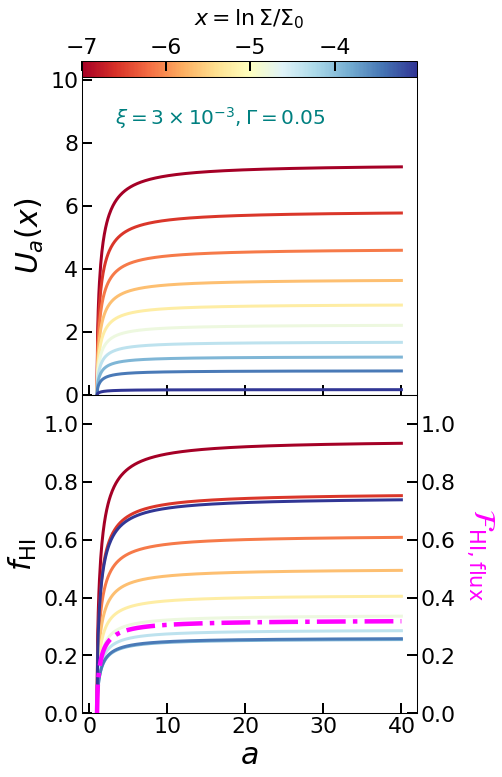

In [130]:
# f, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.05, 'hspace':0.17},figsize=(12,6))

frac_mol = 1. - frac_diss

fig = plt.figure(figsize=(6, 12))
gs = fig.add_gridspec(3, 1, height_ratios=[0.05, 1, 1], width_ratios=[1])


colors =  sns.color_palette("RdYlBu", 8, as_cmap=True)
ax_cbar = fig.add_subplot(gs[0, :2])
sm = ScalarMappable(cmap=colors)
sm.set_array(xval)
cbar = plt.colorbar(sm, cax=ax_cbar, orientation='horizontal')
cbar.set_label(r'$x=\ln \Sigma/ \Sigma_0$', labelpad=-70)
cbar.ax.xaxis.tick_top()


param_range = np.linspace(0, 1, xval.shape[0])

ls = ['-', '--', '--']


cmap  = plt.get_cmap('jet',xval.shape[0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])
# ax3 = fig.add_subplot(gs[1, 2])

j=0
for x in xval:
    ax1.plot(arr, U_ax[j], lw=3.0, color=colors(param_range[j]))
    ax2.plot(arr, frac_diss[j], lw=3.0, color=colors(param_range[j]))
    j+=1
    

ax21 = ax2.twinx()
ax21.plot(arr, FHI, color='fuchsia', ls ='-.', lw=4.5)
ax21.set_ylabel(r'$\mathcal{F}_\mathrm{HI,flux}$', color='fuchsia', fontsize=30, rotation=270, labelpad=40)
ax21.set_ylim(0., 1.1)

ax1.set_ylim(0., 10.1)
ax1.set_xlabel(r"$a$", fontsize=30)
ax1.set_ylabel(r'$U_{a}(x)$', fontsize=30)
# ax1.yaxis.tick_right()
ax1.tick_params(axis="x", which="both", bottom=True, labelbottom=False)
ax1.tick_params(axis="y", which="both", right=False)

# ax2.yaxis.tick_right()
# ax2.set_yticklabels([])
ax2.set_ylabel(r'$f_\mathrm{HI}$', fontsize=30)
ax2.tick_params(axis="y", which="both", right=True, left=True, labelright=False, labelleft=True)
ax2.set_ylim(0., 1.1)
ax2.set_xlabel(r"$a$", fontsize=30)



# ax3.set_ylim(0., 1.1)
# ax3.set_xlabel(r"$a$", fontsize=30)
# ax3.tick_params(axis="y", which="both", right=True, left=True, labelright=True, labelleft=False)
# ax3.yaxis.set_label_position("right")




ax1.text(0.1, 0.85,r'$\xi=3\times10^{-3},\Gamma=0.05$', transform=ax1.transAxes, color='teal', fontsize=20)
# ax2.text(0.65, 0.15,r'$f_\mathrm{HI}$', transform=ax2.transAxes, color='black', fontsize=30)
# ax2.text(0.65, 0.12,r'$\mathcal{F}_\mathrm{HI,flux}$', transform=ax2.transAxes, color='teal', fontsize=30)


plt.subplots_adjust(wspace=0.0, hspace=0.)

file_name = os.path.join(fig_path, 'hi_frac_fAR.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )

In [ ]:
def fHI_integrand1(a, gamma, x, xi, p):
    prefac = xi * np.exp(-x) 
    if(p==2):
        Uax = Uax_fSA(a, gamma, x)
        
    integrand = prefac * (a**(p-2))/Uax
    print(integrand, prefac, Uax)
    return integrand

i=j=0
x=-3.
# for a in arr:
#     if(a==arr[0]):
#         frac=0.0
#     else:
a = arr[5]
frac = integrate.quad(fHI_integrand1, arr[0], a, args=(Gamma, x, xi, 2))[0]
#         print('here=', frac)
i+=1
frac


In [ ]:
amin = 1.
xlow= -3.
xhigh = np.log(Gamma)
xval = np.linspace(xlow, xhigh, 10)
frac_diss_SA = np.zeros((xval.shape[0],arr.shape[0]))
U_ax_SA = np.zeros((xval.shape[0],arr.shape[0]))


i=j=0
for x in xval:
    i=0
    for a in arr:
        if(a==arr[0]):
            frac= 0.0
        else:
            frac = integrate.quad(fHI_integrand, arr[0], a, args=(Gamma, x, xi, 2))[0] 
        frac_diss_SA[j,i]      = min(frac,1.)
        i+=1
    U_ax_SA[j,:] = Uax_fSA(arr, Gamma, x) 
    j+=1
    

# FHI for Fixed Solid Angle

In [ ]:
logxi = -1.5
xi = 10.**logxi
Gamma = 0.5
xlow= -3.
xhigh = np.log(Gamma)
xval = np.linspace(xlow, xhigh, 10)

In [ ]:
arr  = np.linspace(1.,40,10)
dMassFluxHI_SA = np.zeros((arr.shape[0]))
dMassFluxtot_SA = np.zeros((arr.shape[0]))

i = 0 


for a in arr:
    xcrit = np.log(Gamma)
    if(xcrit<0.0):
        xhigh = 1.01*xcrit
    else:
        xhigh = 0.99*xcrit

    
    dMassFluxHI_SA[i] = integrate.dblquad(dMassFlux_HI,1., a, xlow, xhigh,    \
                                            args=(Gamma, xi, Mach, 2))[0]
    dMassFluxtot_SA[i] = integrate.quad(dMassFlux_tot, xlow, xhigh,   \
                                            args=(a, Gamma, Mach, 2))[0]
    print(i)        
    i+=1


In [ ]:
FHI_SA = dMassFluxHI_SA/dMassFluxtot_SA
FHI_SA[FHI_SA>1.] = 1.

In [ ]:

frac_diss_Int = np.zeros((xval.shape[0],arr.shape[0]))
U_ax_Int = np.zeros((xval.shape[0],arr.shape[0]))
j=0
for x in xval:
    i=0
    for a in arr:
        if(a==arr[0]):
            frac= 0.0
        else:
            frac = integrate.quad(fHI_integrand, amin, a, args=(Gamma, x, xi, 1))[0]
        frac_diss_Int[j,i]      = min(frac,1.0)
        i+=1
    U_ax_Int[j,:] = IsoUax_int(arr, Gamma, x) 
    frac_diss_Int[frac_diss_Int>1.] = 1.

    j+=1
    

# FHI for Intermediate

In [ ]:
arr  = np.linspace(1.,40,10)
dMassFluxHI_Int = np.zeros((arr.shape[0]))
dMassFluxtot_Int = np.zeros((arr.shape[0]))

i = 0 


for a in arr:
    xcrit = np.log(Gamma)
    if(xcrit<0.0):
        xhigh = 1.01*xcrit
    else:
        xhigh = 0.99*xcrit

    
    dMassFluxHI_Int[i] = integrate.dblquad(dMassFlux_HI,1., a, xlow, xhigh,    \
                                            args=(Gamma, xi, Mach, 1))[0]
    dMassFluxtot_Int[i] = integrate.quad(dMassFlux_tot, xlow, xhigh,   \
                                            args=(a, Gamma, Mach, 1))[0]
    print(i)        
    i+=1


In [ ]:
FHI_Int = dMassFluxHI_Int/dMassFluxtot_Int
FHI_Int[FHI_Int>1.] = 1.

In [ ]:
# f, ax = plt.subplots(1, 2, gridspec_kw = {'wspace':0.05, 'hspace':0.17},figsize=(12,6))

frac_mol_Int = 1. - frac_diss_Int
frac_mol_SA = 1. - frac_diss_SA

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, height_ratios=[0.05, 1, 1], width_ratios=[1, 1, 1])


colors =  sns.color_palette("RdYlBu", 8, as_cmap=True)
ax_cbar = fig.add_subplot(gs[0, :2])
sm = ScalarMappable(cmap=colors)
sm.set_array(xval)
cbar = plt.colorbar(sm, cax=ax_cbar, orientation='horizontal')
cbar.set_label(r'$x=\ln \Sigma/ \Sigma_0$', labelpad=-70)
cbar.ax.xaxis.tick_top()


param_range = np.linspace(0, 1, xval.shape[0])

ls = ['-', '--', '--']


cmap  = plt.get_cmap('jet',xval.shape[0])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

ax1 = fig.add_subplot(gs[2, 0])
ax2 = fig.add_subplot(gs[2, 1])

ax6 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 2])

j=0
for x in xval:
    ax1.plot(arr, U_ax_SA[j], lw=3.0, color=colors(param_range[j]))
    ax2.plot(arr, frac_diss_SA[j], lw=3.0, color=colors(param_range[j]))
    j+=1
    
j=0
for x in xval:
    ax3.plot(arr, U_ax_Int[j], lw=3.0, color=colors(param_range[j]))
    ax4.plot(arr, frac_diss_Int[j], lw=3.0, color=colors(param_range[j]))
    j+=1

ax5.plot(arr, FHI_SA, color='teal', lw=3.5)    
ax6.plot(arr, FHI_Int, color='teal', lw=3.5)    
    
ax1.set_xlim(0.1, 39.)
ax1.tick_params(axis="x", which="both", bottom=True, labelbottom=True)
ax1.tick_params(axis="y", which="both", right=False, left=True)

ax2.set_xlim(0.1, 39.)
ax2.set_ylim(0., 1.1)
ax2.tick_params(axis="x", which="both", labelbottom=True, bottom=True)
ax2.tick_params(axis="y", which="both", right=True, left=True, labelleft=False)

ax3.set_xlim(0.1, 39.)
# ax3.set_ylim(0.1, 3.9)
ax3.set_xlabel(r"$a$", fontsize=30)
ax3.tick_params(axis="x", which="both", top=True, bottom=True, labelbottom=False)

ax4.set_xlim(0.1, 40.)
ax4.set_ylim(0., 1.1)
ax4.set_xlabel(r"$a$", fontsize=30)
ax4.tick_params(axis="x", which="both", top=True, bottom=True, labelbottom=False)
ax4.tick_params(axis="y", which="both", right=True, left=True, labelleft=False)


ax5.set_xlim(0.1, 40.)
ax5.set_ylim(0., 1.1)
ax5.tick_params(axis="x", which="both", top=True, labelbottom=True, bottom=True)
ax5.tick_params(axis="y", which="both", right=True, left=True, labelleft=False, labelright=True)

ax6.set_xlim(0.1, 40.)
ax6.set_ylim(0., 1.1)
ax6.set_xlabel(r"$a$", fontsize=30)
ax6.tick_params(axis="x", which="both", top=True, bottom=True, labelbottom=False)
ax6.tick_params(axis="y", which="both", right=True, left=True, labelleft=False, labelright=True)


# ax3.set_ylabel(r'$f_\mathrm{H_2}$', fontsize=30)

ax2.text(0.1, 0.85,'Solid Angle', transform=ax1.transAxes, color='darkslategrey', fontsize=28)
ax4.text(0.05, 0.85,'Intermediate', transform=ax3.transAxes, color='darkslategrey', fontsize=30)


ax1.text(0.65, 0.15,r'$U_{a}(x)$', transform=ax1.transAxes, color='black', fontsize=30)
ax2.text(0.65, 0.15,r'$f_\mathrm{HI}$', transform=ax2.transAxes, color='black', fontsize=30)
ax5.text(0.65, 0.15,r'$\mathcal{F}_\mathrm{HI,flux}$', transform=ax5.transAxes, color='black', fontsize=30)



plt.subplots_adjust(wspace=0.02, hspace=0.04)

file_name = os.path.join(fig_path, 'hi_frac_fSA_int.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )